In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns

In [126]:
df1 = pd.read_csv('Cleaned_IMDB.csv')
df2 = pd.read_csv('Cleaned_Movies.csv')
df3 = pd.read_csv('Budgets.csv')

What is the average movie budget in the past 10 years?

In [3]:
df3.head(30)

,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,12/31/2020,Hannibal the Conqueror,"$50,000,000",$0,$0
1,12/31/2020,Moonfall,"$150,000,000",$0,$0
2,12/31/2019,Army of the Dead,"$90,000,000",$0,$0
3,12/31/2019,Reagan,"$25,000,000",$0,$0
4,12/31/2019,355,"$75,000,000",$0,$0
5,12/31/2019,Rogue City,"$13,000,000",$0,$0
6,12/31/2019,Eli,"$11,000,000",$0,$0
7,12/31/2019,Down Under Cover,"$40,000,000",$0,$0
8,12/31/2018,The Crow,"$40,000,000",$0,$0
9,12/31/2018,Red 11,"$7,000",$0,$0


In [4]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 5 columns):
release_date         5782 non-null object
movie                5782 non-null object
production_budget    5782 non-null object
domestic_gross       5782 non-null object
worldwide_gross      5782 non-null object
dtypes: object(5)
memory usage: 226.0+ KB


In [5]:
df3['release_date'] = df3['release_date'].astype('datetime64')

In [6]:
df3.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,2020-12-31,Hannibal the Conqueror,"$50,000,000",$0,$0
1,2020-12-31,Moonfall,"$150,000,000",$0,$0
2,2019-12-31,Army of the Dead,"$90,000,000",$0,$0
3,2019-12-31,Reagan,"$25,000,000",$0,$0
4,2019-12-31,355,"$75,000,000",$0,$0


In [7]:
df3.set_index(['release_date'], inplace = True)


In [8]:
df4 = df3.loc['2010-1-1':'2020-12-31']

In [9]:
df4[df4.columns[1:]] = df4[df4.columns[1:]].apply(lambda x: x.str.replace('$','')).apply(lambda x: x.str.replace(',','')).astype('int64')

C:\Users\mered\anaconda3\envs\learn-env\lib\site-packages\pandas\core\frame.py:3494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [237]:
df4.head()

,movie,production_budget,domestic_gross,worldwide_gross,Profit
release_date,,,,,
2020-12-31,Hannibal the Conqueror,50000000,0,0,-50000000
2020-12-31,Moonfall,150000000,0,0,-150000000
2019-12-31,Army of the Dead,90000000,0,0,-90000000
2019-12-31,Reagan,25000000,0,0,-25000000
2019-12-31,355,75000000,0,0,-75000000


In [35]:
df4['Profit'] = (df4['worldwide_gross'] - df4['production_budget'])

C:\Users\mered\anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [235]:
df4.describe()

,production_budget,domestic_gross,worldwide_gross,Profit
count,2.194000e+03,2.194000e+03,2.194000e+03,2.194000e+03
mean,3.653347e+07,4.411203e+07,1.118934e+08,7.535989e+07
std,5.154415e+07,7.979735e+07,2.152202e+08,1.771111e+08
min,1.400000e+03,0.000000e+00,0.000000e+00,-2.002376e+08
25%,4.500000e+06,9.377150e+04,1.023780e+06,-2.000000e+06
50%,1.690000e+07,1.279090e+07,2.752135e+07,8.366398e+06
75%,4.200000e+07,5.332470e+07,1.132702e+08,7.142336e+07
max,4.106000e+08,9.366622e+08,2.053311e+09,1.748134e+09


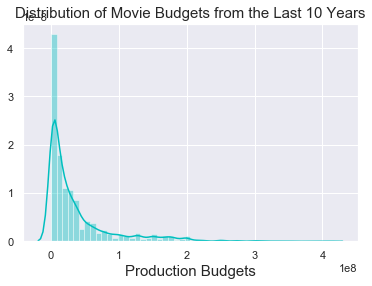

In [76]:

g = sns.distplot(df4.production_budget, bins = 50, color = 'c')
plt.xlabel('Production Budgets', fontsize = 15)
sns.set_style("darkgrid")
sns.plotting_context('paper', font_scale = 100)
plt.title('Distribution of Movie Budgets from the Last 10 Years', fontsize = 15)
plt.show(g)

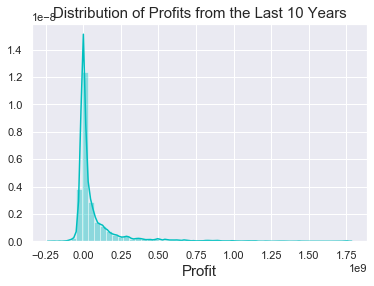

In [75]:
g = sns.distplot(df4.Profit, bins = 50, color = 'c')
plt.xlabel('Profit', fontsize = 15)
sns.set_style("darkgrid")
sns.plotting_context('paper', font_scale = 100)
plt.title('Distribution of Profits from the Last 10 Years', fontsize = 15)
plt.show(g)

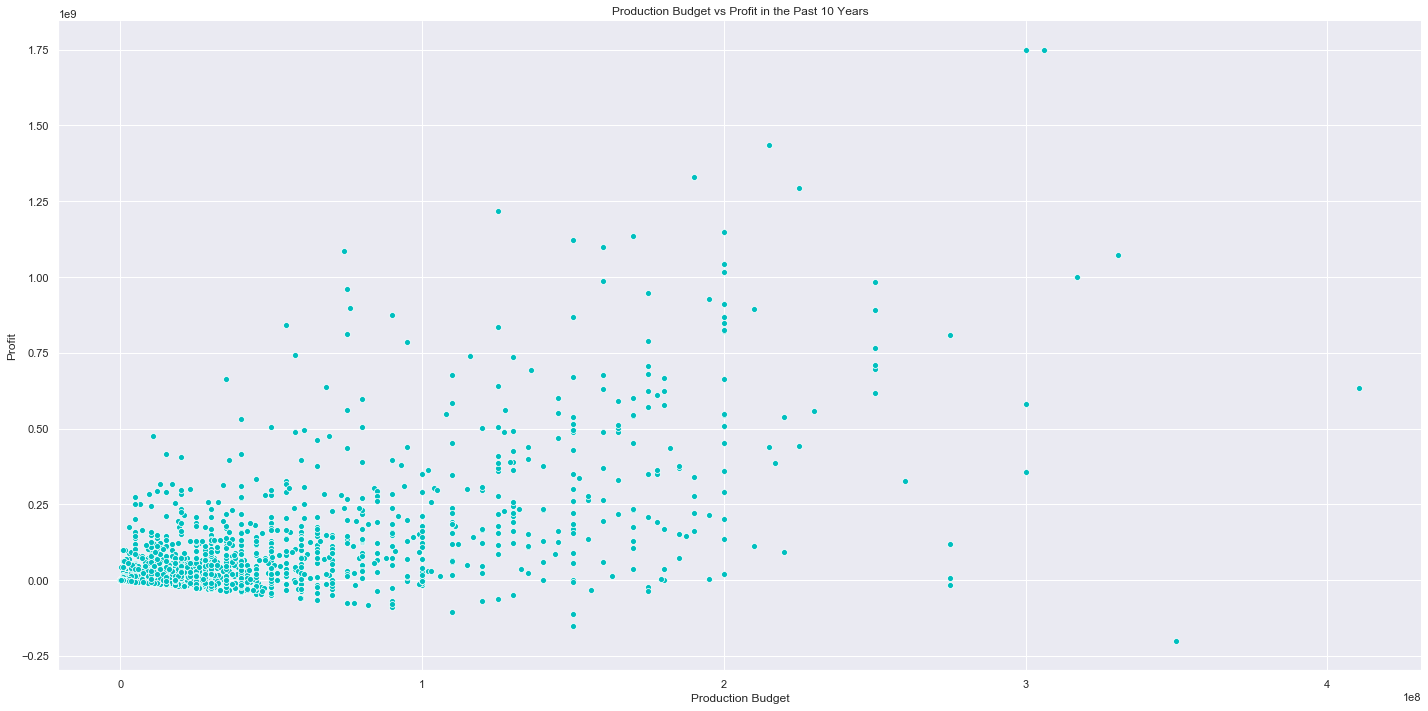

In [36]:
plot = sns.relplot(x = 'Production Budget', y = 'Profit', data = df4, height = 10, aspect =2, color = 'c')
plt.title('Production Budget vs Profit in the Past 10 Years')
plt.xlabel('Production Budget')
plt.ylabel('Profit')
plt.show()

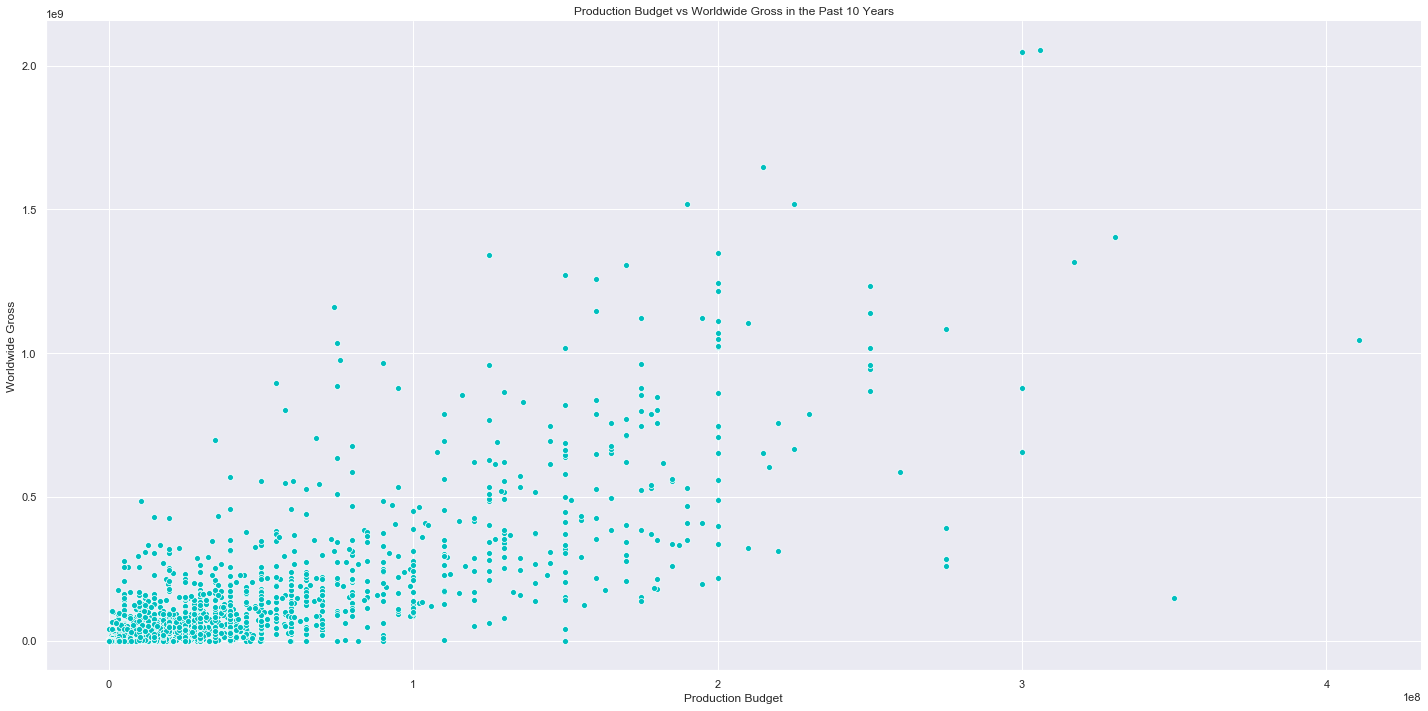

In [28]:

sns.relplot(x = 'production_budget', y = 'worldwide_gross', data = df4, height = 10, aspect = 2, color = 'c')
plt.title('Production Budget vs Worldwide Gross in the Past 10 Years')
plt.xlabel('Production Budget')
plt.ylabel('Worldwide Gross')
plt.show()

In [13]:
df1.head()

,primary_title,original_title,start_year,runtime_minutes,Action,Adult,Adventure,Animation,Biography,Comedy,...,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western,averagerating,numvotes
0,Sunghursh,Sunghursh,2013,175.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,77.0
1,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.2,43.0
2,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.9,4517.0
3,Sabse Bada Sukh,Sabse Bada Sukh,2018,87.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.1,13.0
4,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.5,119.0


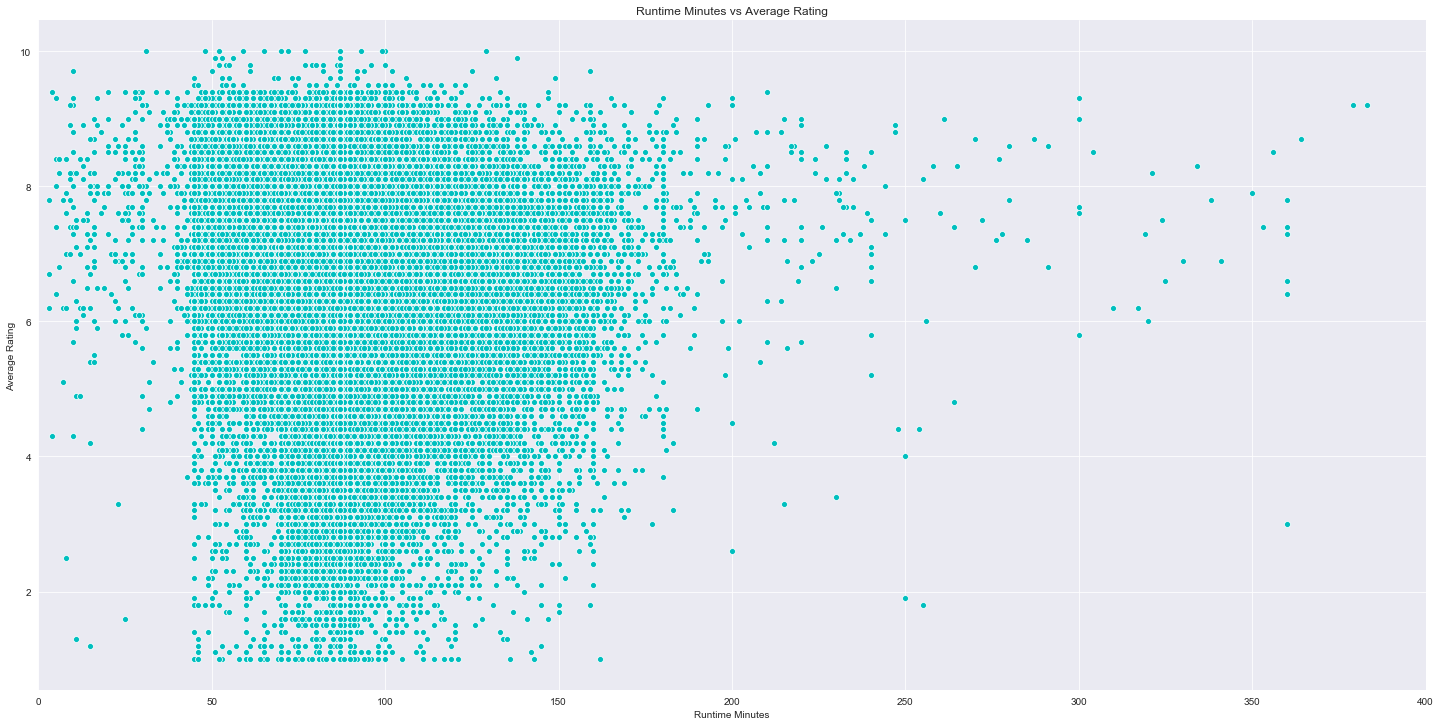

In [14]:
sns.relplot(x = 'runtime_minutes', y = 'averagerating', data = df1, height = 10, aspect = 2, color = 'c')
plt.title('Runtime Minutes vs Average Rating')
plt.xlim(0,400)
plt.xlabel('Runtime Minutes')
plt.ylabel('Average Rating')
plt.show()

In [15]:
df1.describe()

,start_year,runtime_minutes,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Documentary,...,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western,averagerating,numvotes
count,146144.000000,146144.000000,146144.000000,146144.000000,146144.000000,146144.000000,146144.000000,146144.000000,146144.000000,146144.000000,...,146144.000000,146144.000000,146144.000000,146144.000000,146144.000000,146144.000000,146144.000000,146144.000000,73856.000000,7.385600e+04
mean,2014.621798,86.363758,0.070718,0.000171,0.044237,0.019152,0.059681,0.173199,0.046208,0.353350,...,0.064129,0.023025,0.000075,0.015286,0.000342,0.081310,0.009614,0.003195,6.332729,3.523662e+03
std,2.733583,147.191650,0.256354,0.013078,0.205622,0.137061,0.236895,0.378421,0.209936,0.478012,...,0.244983,0.149984,0.008675,0.122690,0.018494,0.273312,0.097578,0.056438,1.474978,3.029402e+04
min,2010.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,5.000000e+00
25%,2012.000000,75.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.500000,1.400000e+01
50%,2015.000000,87.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.500000,4.900000e+01
75%,2017.000000,95.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.400000,2.820000e+02
max,2115.000000,51420.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10.000000,1.841066e+06


In [16]:
df1.runtime_minutes = df1.runtime_minutes.astype('int64')

In [17]:
median = df1['runtime_minutes'].median()
std = df1['runtime_minutes'].std()
outliers = (df1['runtime_minutes'] - median).abs() > std
df1[outliers] = np.nan
df1['runtime_minutes'].fillna(median, inplace=True)

In [18]:
df1.describe()

,start_year,runtime_minutes,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Documentary,...,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western,averagerating,numvotes
count,145907.000000,146144.000000,145907.000000,145907.000000,145907.000000,145907.000000,145907.000000,145907.000000,145907.000000,145907.000000,...,145907.000000,145907.000000,145907.000000,145907.000000,145907.000000,145907.000000,145907.000000,145907.000000,73764.000000,7.376400e+04
mean,2014.622438,85.109187,0.070730,0.000171,0.044227,0.019149,0.059723,0.173350,0.046235,0.353088,...,0.064185,0.023015,0.000075,0.015277,0.000343,0.081408,0.009629,0.003194,6.331571,3.526365e+03
std,2.733538,24.480195,0.256374,0.013089,0.205599,0.137050,0.236974,0.378551,0.209994,0.477931,...,0.245083,0.149950,0.008682,0.122652,0.018509,0.273462,0.097656,0.056424,1.474547,3.031164e+04
min,2010.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,5.000000e+00
25%,2012.000000,75.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.500000,1.400000e+01
50%,2015.000000,87.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.500000,4.900000e+01
75%,2017.000000,95.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.400000,2.820000e+02
max,2115.000000,234.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10.000000,1.841066e+06


Text(0.5, 0, 'Runtime Minutes')

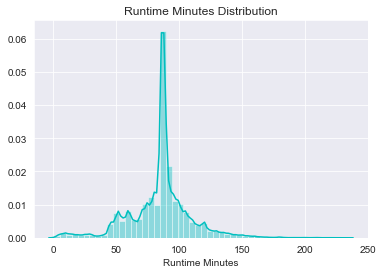

In [19]:
sns.distplot(df1.runtime_minutes, bins = 50, color = 'c')
sns.set_context('notebook')
plt.title('Runtime Minutes Distribution')
plt.xlabel('Runtime Minutes')

In [20]:
Action = df1.Action.sum()

In [21]:
Adult = df1.Adult.sum()

In [22]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 34 columns):
primary_title      145907 non-null object
original_title     145886 non-null object
start_year         145907 non-null float64
runtime_minutes    146144 non-null float64
Action             145907 non-null float64
Adult              145907 non-null float64
Adventure          145907 non-null float64
Animation          145907 non-null float64
Biography          145907 non-null float64
Comedy             145907 non-null float64
Crime              145907 non-null float64
Documentary        145907 non-null float64
Drama              145907 non-null float64
Family             145907 non-null float64
Fantasy            145907 non-null float64
Game-Show          145907 non-null float64
History            145907 non-null float64
Horror             145907 non-null float64
Music              145907 non-null float64
Musical            145907 non-null float64
Mystery            145907 non-n

In [49]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 26 columns):
original_language    26517 non-null object
original_title       26517 non-null object
popularity           26517 non-null float64
release_date         26517 non-null object
title                26517 non-null object
vote_average         26517 non-null float64
vote_count           26517 non-null int64
Music                26517 non-null float64
Romance              26517 non-null float64
Family               26517 non-null float64
War                  26517 non-null float64
TV Movie             26517 non-null float64
Adventure            26517 non-null float64
Fantasy              26517 non-null float64
Animation            26517 non-null float64
Drama                26517 non-null float64
Horror               26517 non-null float64
Action               26517 non-null float64
Comedy               26517 non-null float64
History              26517 non-null float64
Western          

In [185]:
df2 = df2.replace(2.0,1.0)
df2 = df2.replace(3.0,1.0)


In [186]:
Music = df2.loc[df2['Music']>=1]
Romance = df2.loc[df2['Romance']>=1]
Family = df2.loc[df2['Family']>=1]
War = df2.loc[df2['War']>=1]
TV_Movie = df2.loc[df2['TV Movie']>=1]
Adventure = df2.loc[df2['Adventure']>=1]
Fantasy = df2.loc[df2['Fantasy']>=1]
Animation = df2.loc[df2['Animation']>=1]
Drama = df2.loc[df2['Drama']>=1]
Horror = df2.loc[df2['Horror']>=1]
Action = df2.loc[df2['Action']>=1]
Comedy = df2.loc[df2['Comedy']>=1]
History = df2.loc[df2['History']>=1]
Western = df2.loc[df2['Western']>=1]
Thriller = df2.loc[df2['Thriller']>=1]
Crime = df2.loc[df2['Crime']>=1]
Science_Fiction = df2.loc[df2['Science Fiction']>=1]
Mystery = df2.loc[df2['Mystery']>=1]
Documentary = df2.loc[df2['Documentary']>=1]

In [197]:
Action.describe()

,popularity,vote_average,vote_count,Music,Romance,Family,War,TV Movie,Adventure,Fantasy,...,Horror,Action,Comedy,History,Western,Thriller,Crime,Science Fiction,Mystery,Documentary
count,1651.000000,1651.000000,1651.000000,1651.0,1651.0,1651.0,1651.0,1651.0,1651.0,1651.0,...,1651.0,1651.0,1651.0,1651.0,1651.0,1651.0,1651.0,1651.0,1651.0,1651.0
mean,6.625442,5.530042,791.862508,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,7.728879,1.741158,2238.582920,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.600000,0.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,1.291000,4.700000,4.500000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,3.910000,5.700000,28.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,9.105500,6.500000,231.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,78.123000,10.000000,22186.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Text(0, 0.5, '')

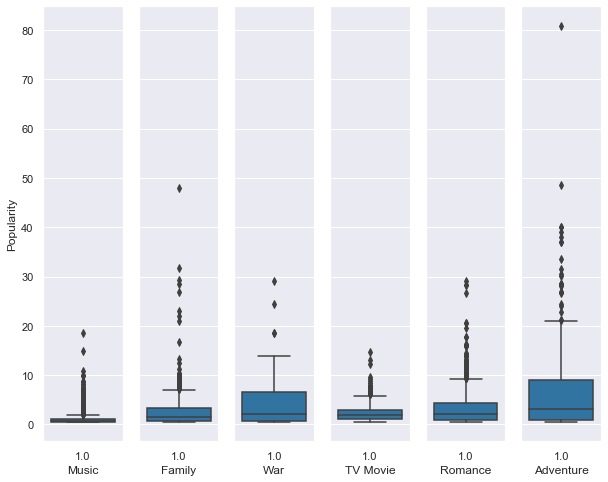

In [223]:
f, axes = plt.subplots(1,6, figsize = (10,8), sharey = True)
sns.boxplot(  y="popularity", x= "Music", data=Music, orient='v' , ax=axes[0])
sns.boxplot(  y="popularity", x= "Family", data=Family,  orient='v' , ax=axes[1])
sns.boxplot(  y="popularity", x= "War", data=War,  orient='v' , ax=axes[2])
sns.boxplot(  y="popularity", x= "TV Movie", data=TV_Movie,  orient='v' , ax=axes[3])
sns.boxplot(  y="popularity", x= "Romance", data=Romance,  orient='v' , ax=axes[4])
sns.boxplot(  y="popularity", x= "Adventure", data=Adventure,  orient='v' , ax=axes[5])
axes[0].set_ylabel('Popularity')
axes[1].set_ylabel('')
axes[2].set_ylabel('')
axes[3].set_ylabel('')
axes[4].set_ylabel('')
axes[5].set_ylabel('')

Text(0, 0.5, '')

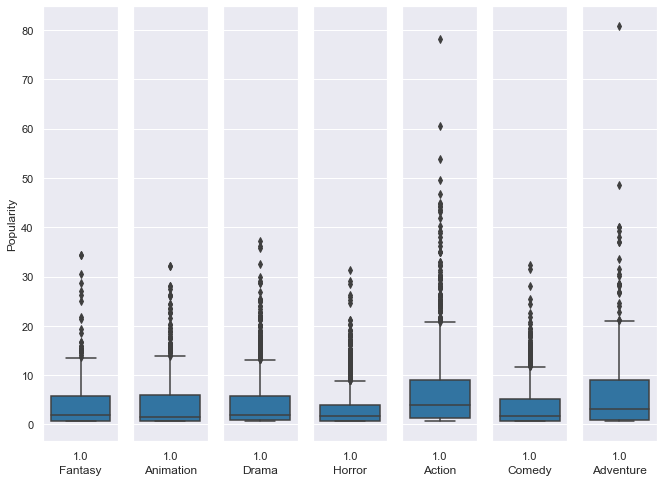

In [233]:
f, axes = plt.subplots(1,7, figsize = (11,8), sharey = True)
sns.boxplot(  y="popularity", x= "Fantasy", data=Fantasy, orient='v' , ax=axes[0])
sns.boxplot(  y="popularity", x= "Animation", data=Animation,  orient='v' , ax=axes[1])
sns.boxplot(  y="popularity", x= "Drama", data=Drama,  orient='v' , ax=axes[2])
sns.boxplot(  y="popularity", x= "Horror", data=Horror,  orient='v' , ax=axes[3])
sns.boxplot(  y="popularity", x= "Action", data=Action,  orient='v' , ax=axes[4])
sns.boxplot(  y="popularity", x= "Comedy", data=Comedy,  orient='v' , ax=axes[5])
sns.boxplot(  y="popularity", x= "Adventure", data=Adventure,  orient='v' , ax=axes[6])
axes[0].set_ylabel('Popularity')
axes[1].set_ylabel('')
axes[2].set_ylabel('')
axes[3].set_ylabel('')
axes[4].set_ylabel('')
axes[5].set_ylabel('')
axes[6].set_ylabel('')

Text(0, 0.5, '')

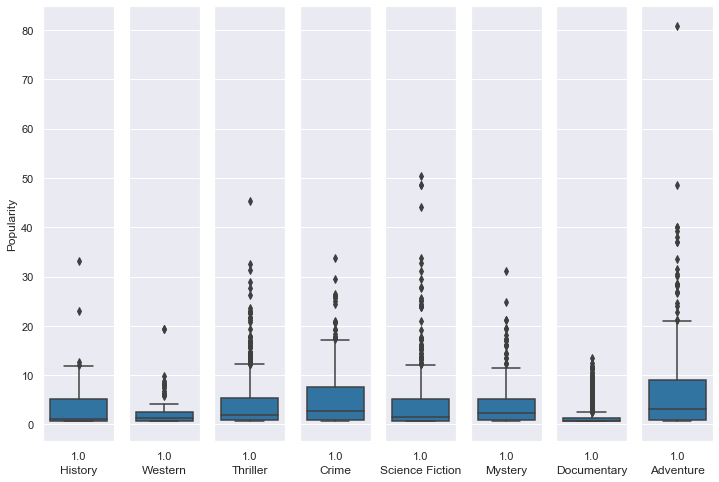

In [234]:
f, axes = plt.subplots(1,8, figsize = (12,8), sharey = True)
sns.boxplot(  y="popularity", x= "History", data=History, orient='v' , ax=axes[0])
sns.boxplot(  y="popularity", x= "Western", data=Western,  orient='v' , ax=axes[1])
sns.boxplot(  y="popularity", x= "Thriller", data=Thriller,  orient='v' , ax=axes[2])
sns.boxplot(  y="popularity", x= "Crime", data=Crime,  orient='v' , ax=axes[3])
sns.boxplot(  y="popularity", x= "Science Fiction", data=Science_Fiction,  orient='v' , ax=axes[4])
sns.boxplot(  y="popularity", x= "Mystery", data=Mystery,  orient='v' , ax=axes[5])
sns.boxplot(  y="popularity", x= "Documentary", data=Documentary,  orient='v' , ax=axes[6])
sns.boxplot(  y="popularity", x= "Adventure", data=Adventure,  orient='v' , ax=axes[7])
axes[0].set_ylabel('Popularity')
axes[1].set_ylabel('')
axes[2].set_ylabel('')
axes[3].set_ylabel('')
axes[4].set_ylabel('')
axes[5].set_ylabel('')
axes[6].set_ylabel('')
axes[7].set_ylabel('')

In [38]:
df2.describe()

,popularity,vote_average,vote_count,Music,Romance,Family,War,TV Movie,Adventure,Fantasy,...,Horror,Action,Comedy,History,Western,Thriller,Crime,Science Fiction,Mystery,Documentary
count,26517.000000,26517.000000,26517.000000,26517.000000,26517.000000,26517.000000,26517.000000,26517.000000,26517.000000,26517.000000,...,26517.000000,26517.000000,26517.000000,26517.000000,26517.000000,26517.000000,26517.000000,26517.000000,26517.000000,26517.000000
mean,3.130912,5.991281,194.224837,0.026549,0.028435,0.017687,0.004261,0.013840,0.023117,0.012633,...,0.088660,0.066259,0.147000,0.005242,0.003356,0.062941,0.022778,0.022702,0.012256,0.178791
std,4.355229,1.852946,960.961095,0.166752,0.179312,0.134643,0.070694,0.117473,0.167825,0.117609,...,0.303631,0.265178,0.381984,0.078229,0.062838,0.263992,0.165039,0.156367,0.123284,0.416118
min,0.600000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.600000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.374000,6.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.694000,7.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,80.773000,10.000000,22186.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,...,3.000000,3.000000,3.000000,2.000000,2.000000,3.000000,2.000000,2.000000,3.000000,3.000000
